101
125
30
256


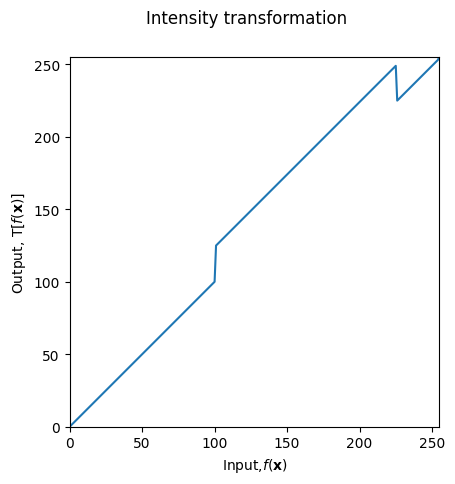

<function destroyAllWindows>

In [2]:
%matplotlib inline
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

#Intensity Transformation
t1 = np.linspace(0,100,101).astype('uint8')
print(len(t1))
t2 = np.linspace(125,249,125).astype('uint8')
print(len(t2))
t3 = np.linspace(225, 255, 30).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T} [f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
fig.suptitle("Intensity transformation")
plt.show()

#Displaying Original Image
img_orig = cv.imread('natasha_grayscale.jpg',cv.IMREAD_GRAYSCALE)
cv.namedWindow("Images", cv.WINDOW_AUTOSIZE)
cv.imshow("Images",img_orig)
cv.waitKey(0)

#Diplaying Transformed Image
img_transformed = cv.LUT(img_orig,transform)
cv.imshow("Images",img_transformed)
cv.waitKey(0)
cv.destroyAllWindows







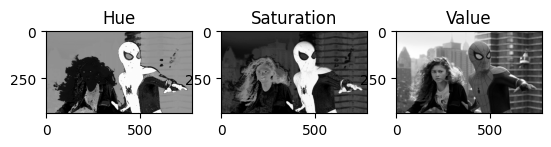

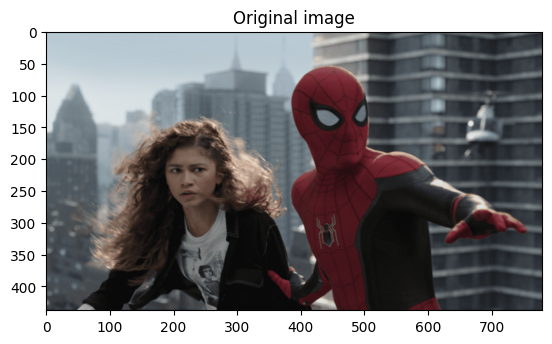

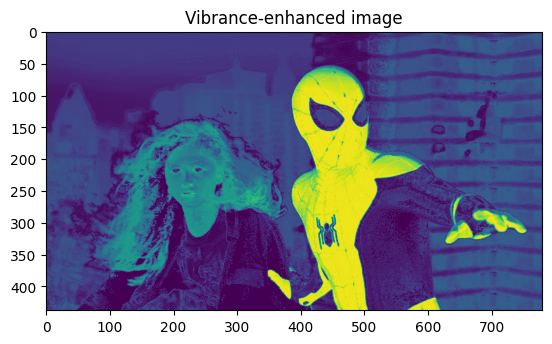

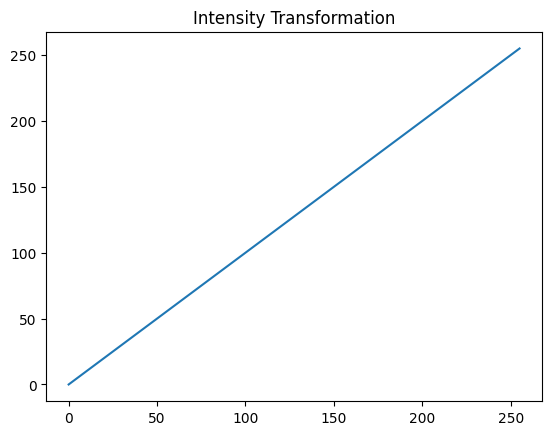

In [21]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_original = cv.imread('spider.png', cv.IMREAD_COLOR)
assert img_original is not None

#splitting the image into hue.saturation and value planes
img = cv.cvtColor(img_original, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = cv.split(img)

fig, ax = plt.subplots(1,3)
ax[0].imshow(h_img, cmap= "gray")
ax[0].set_title('Hue')
ax[1].imshow(s_img, cmap= "gray")
ax[1].set_title('Saturation')
ax[2].imshow(v_img, cmap= "gray")
ax[2].set_title('Value')
plt.show()

#Appling intensity transformation to the saturation plane
x = np.arange(0,256). astype('uint8')
a = .1
sigma = 70
Y =np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128),255).astype('uint8')
img_transformed = cv.LUT(s_img,Y)

#Recombining the three planes
img_recombined= cv.merge([h_img,img_transformed,v_img])

#Displaying the original image
plt.title('Original image')
img_original = cv.cvtColor(img_original,cv.COLOR_BGR2RGB)
plt.imshow(img_original)
plt.show()

#Displaying vibrance-enhanced image
plt.title('Vibrance-enhanced image')
plt.imshow(img_transformed)
plt.show()

#Displaying Intensity Transformation
plt.title('Intensity Transformation')
plt.plot(Y)
plt.show()




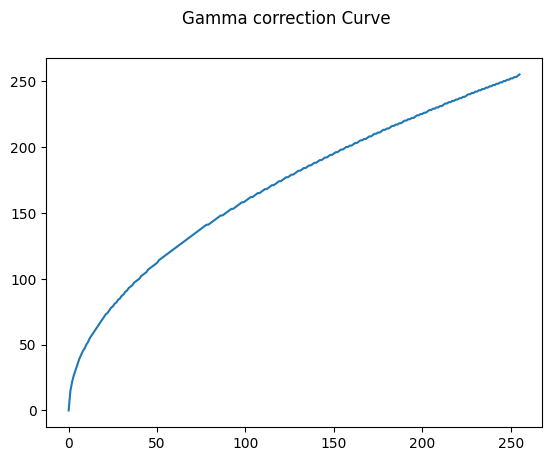

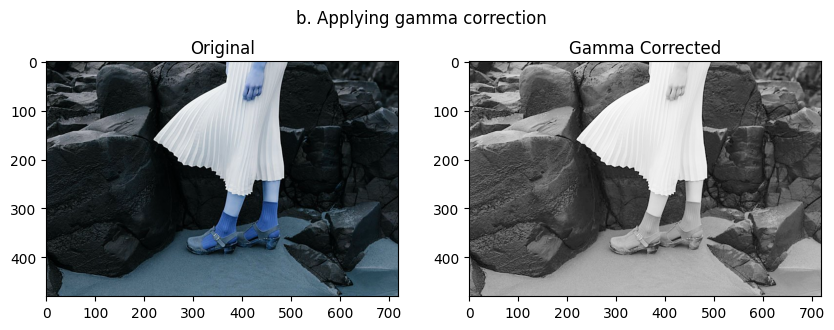

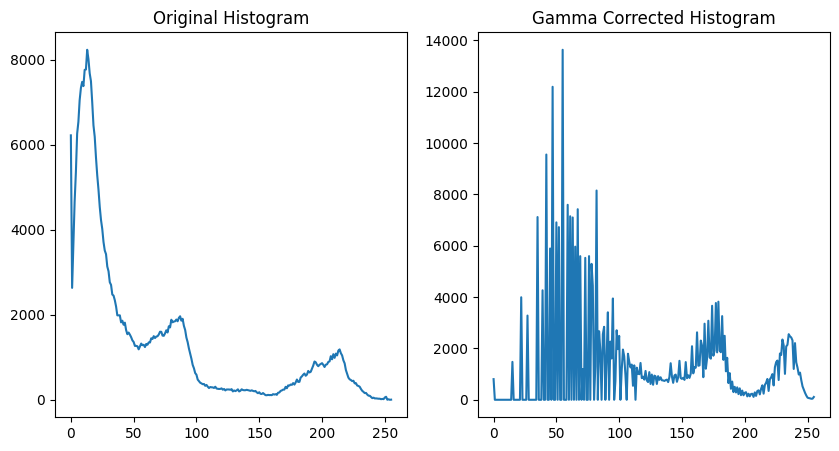

In [27]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread ('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None

#Applying gamma correction
img_LAB = cv.cvtColor(img, cv.COLOR_BGR2LAB) 
L_img, q_img , r_img = cv.split(img_LAB)

gamma = .5
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)
g = t[L_img]
plt.suptitle("Gamma correction Curve")
plt.plot(t)
plt.show()


fig, ax = plt.subplots(1,2, figsize=(10,3.5))
fig.suptitle("b. Applying gamma correction")
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(g, cmap="gray")
ax[1].set_title("Gamma Corrected")
plt.show()

plt.figure(figsize = [10, 5])
#Histogram of the Original Image
plt.subplot(1, 2, 1)
plt.gca().set_title('Original Histogram')
im_h = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(im_h)
#Histogram of the Corrected Image
plt.subplot(1, 2, 2)
plt.gca().set_title('Gamma Corrected Histogram')
g_h = cv.calcHist([g],[0],None,[256],[0,256])
plt.plot(g_h)
plt.show()